# Ornstein-Uhlenbeck process
The goal of thist notebook is to see wehther the variance is dependent on dt.

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from mpl_toolkits.axes_grid1 import make_axes_locatable

%matplotlib inline

plt.rcParams["figure.figsize"] = [16,9]
sns.set(font_scale=2.5)

In [30]:
mu = 5.0
sigma = 2.0
tau_m = 0.100

dt = 0.001
total_time = 2.0
n_processes = 5000
nt = int(total_time / dt)
x = np.zeros((nt, n_processes))
x0 = 0
x[0, :] = x0
normalized_sigma = sigma * np.sqrt(dt)
noise = normalized_sigma * np.random.normal(loc=0, scale=1.0, size=(nt, n_processes))

for i in range(nt - 1):
    x[i + 1, :] = x[i, :] + (dt / tau_m) *(mu - x[i, :]) + noise[i, :]

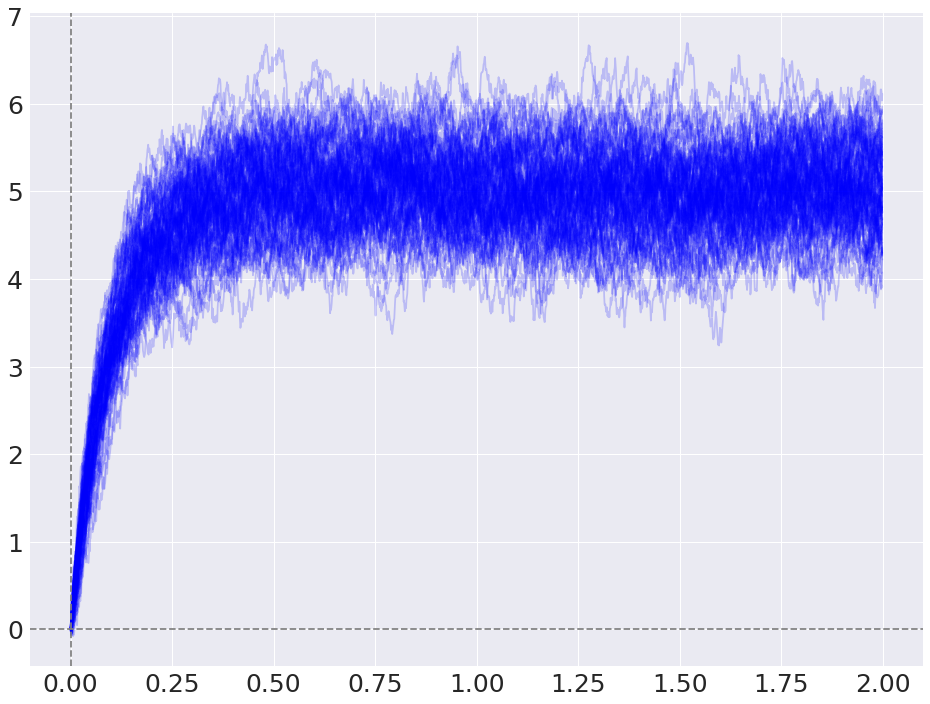

In [31]:
time = np.arange(0, total_time, dt)


fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
for i in range(100):
    ax.plot(time, x[:, i], color='blue', alpha=0.2)

ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray');

In [37]:
t_forget = 1.8
n_forget = int(t_forget / dt)
var_estimated = np.var(x[n_forget, :])
print(var_estimated)
var_theo = 0.5 * tau_m * sigma ** 2
print(var_theo)

0.196995092989
0.2


#### Dependence on dt

In [45]:
mu = 5.0
sigma = 2.0
tau_m = 0.100

num = 10
total_time = 2.0
n_processes = 2500
dt_space = np.logspace(-4, -2.0, num=num)
variance = np.zeros(num)

for index, dt in enumerate(dt_space):
    print(index)
    nt = int(total_time / dt)
    x = np.zeros((nt, n_processes))
    x0 = 0
    x[0, :] = x0
    normalized_sigma = sigma * np.sqrt(dt)
    noise = normalized_sigma * np.random.normal(loc=0, scale=1.0, size=(nt, n_processes))

    for i in range(nt - 1):
        x[i + 1, :] = x[i, :] + (dt / tau_m) *(mu - x[i, :]) + noise[i, :]

    var_estimated = np.var(x[-1, :])
    variance[index] = var_estimated

0
1
2
3
4
5
6
7
8
9


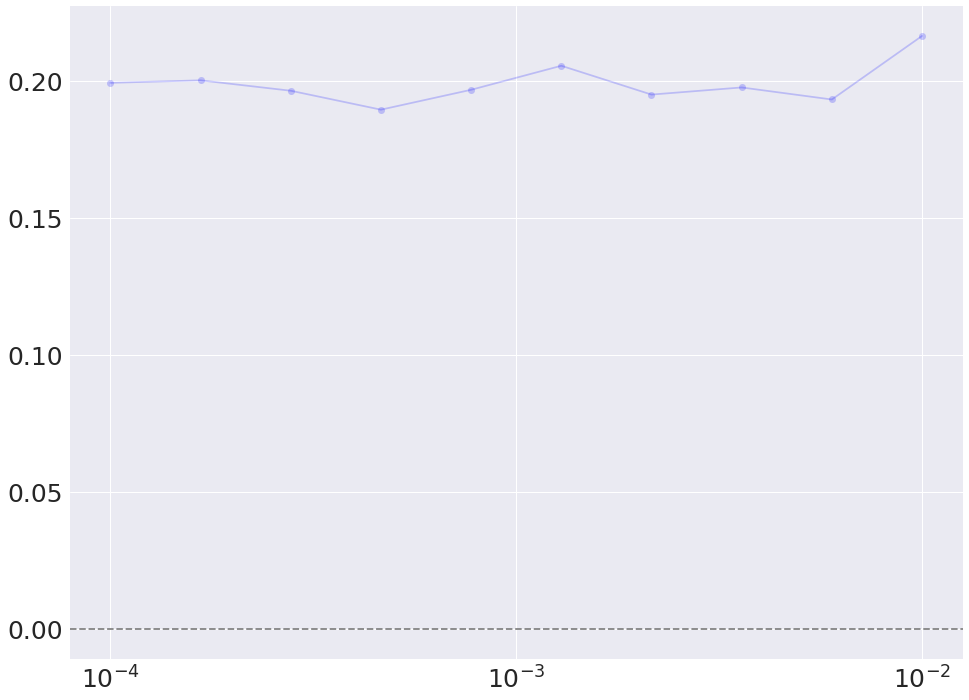

In [53]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)

ax.semilogx(dt_space, variance, 'o-', color='blue', alpha=0.2)
ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray');

In [54]:
mu = 5.0
sigma = 2.0
tau_m = 0.100

num = 10
total_time = 2.0
n_processes = 2500
dt_space = np.logspace(-4, -2.0, num=num)
variance = np.zeros(num)

for index, dt in enumerate(dt_space):
    print(index)
    nt = int(total_time / dt)
    x = np.zeros((nt, n_processes))
    x0 = 0
    x[0, :] = x0
    normalized_sigma = sigma 
    noise = normalized_sigma * np.random.normal(loc=0, scale=1.0, size=(nt, n_processes))

    for i in range(nt - 1):
        x[i + 1, :] = x[i, :] + (dt / tau_m) *(mu - x[i, :]) + noise[i, :]

    var_estimated = np.var(x[-1, :])
    variance[index] = var_estimated

0
1
2
3
4
5
6
7
8
9


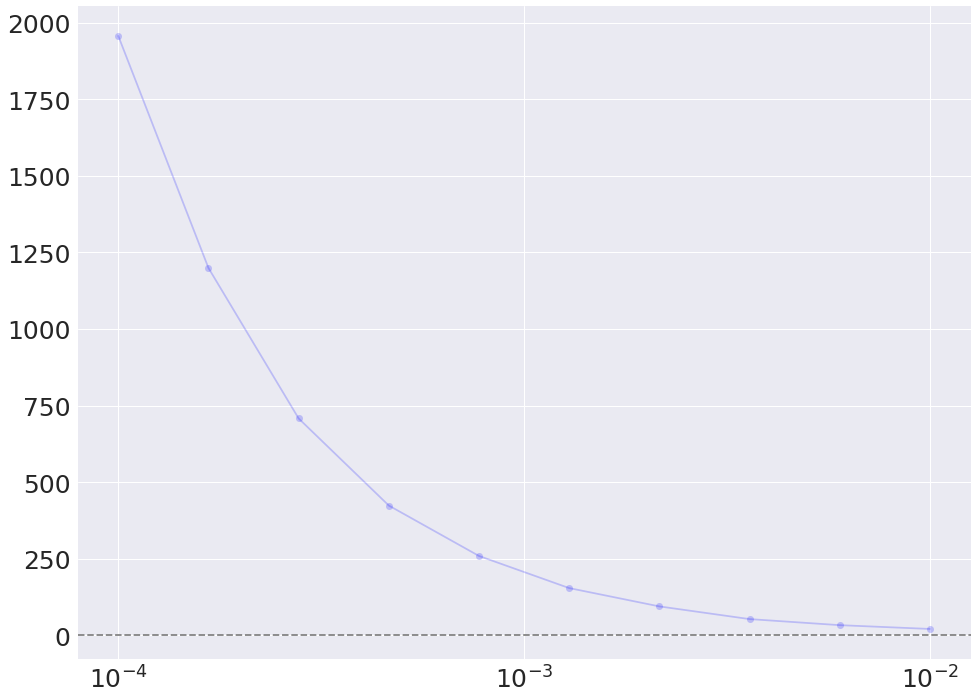

In [55]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)

ax.semilogx(dt_space, variance, 'o-', color='blue', alpha=0.2)
ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray');

## Let's illustrated it visually

In [82]:
mu = 5.0
sigma = 1.0
tau_m = 0.100
total_time = 2.0
n_processes = 100

dt1 = 0.001
nt = int(total_time / dt1)
x = np.zeros((nt, n_processes))
x0 = 0
x[0, :] = x0
normalized_sigma = sigma 
noise = normalized_sigma * np.random.normal(loc=0, scale=1.0, size=(nt, n_processes))

for i in range(nt - 1):
    x[i + 1, :] = x[i, :] + (dt1 / tau_m) *(mu - x[i, :]) + noise[i, :]
    
dt2 = 0.0001
nt = int(total_time / dt2)
y = np.zeros((nt, n_processes))
y0 = 0
y[0, :] = y0
normalized_sigma = sigma
noise = normalized_sigma * np.random.normal(loc=0, scale=1.0, size=(nt, n_processes))

for i in range(nt - 1):
    y[i + 1, :] = y[i, :] + (dt2 / tau_m) *(mu - y[i, :]) + noise[i, :]

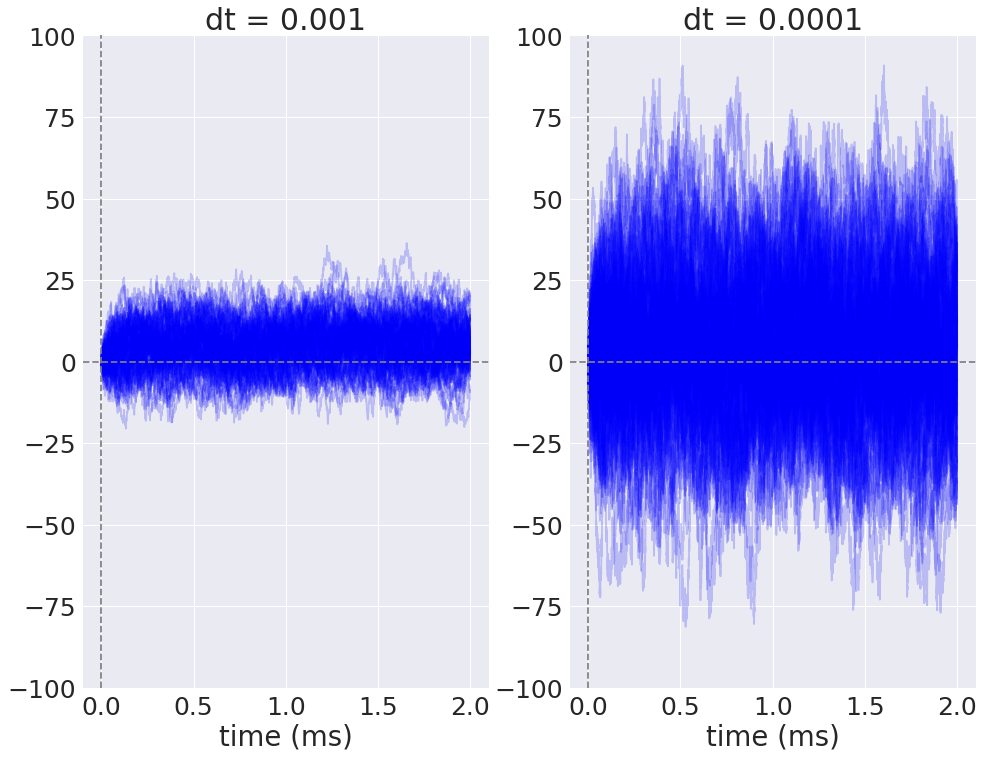

In [84]:
lim = 100
time1 = np.arange(0, total_time, dt1)
time2 = np.arange(0, total_time, dt2)


fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

for i in range(100):
    ax1.plot(time1, x[:, i], color='blue', alpha=0.2)
    
for i in range(100):
    ax2.plot(time2, y[:, i], color='blue', alpha=0.2)


ax1.set_title(r'dt = ' + str(dt1))
ax1.set_ylim([-lim, lim])
ax1.axhline(0, ls='--', color='gray')
ax1.axvline(0, ls='--', color='gray')
ax1.set_xlabel('time (ms)')

ax2.set_title(r'dt = ' + str(dt2))
ax2.set_ylim([-lim, lim])
ax2.set_xlabel('time (ms)')
ax2.axhline(0, ls='--', color='gray')
ax2.axvline(0, ls='--', color='gray');